In [1]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Token classification

Token classification assigns a label to individual tokens in a sentence. One of the most common token classification tasks is Named Entity Recognition (NER). NER attempts to find a label for each entity in a sentence, such as a person, location, or organization.

This guide will show you how to:

1. Finetune [DistilBERT](https://huggingface.co/distilbert-base-uncased) on the [WNUT 17](https://huggingface.co/datasets/wnut_17) dataset to detect new entities.
2. Use your finetuned model for inference.

<Tip>
The task illustrated in this tutorial is supported by the following model architectures:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

```bash
pip install transformers datasets evaluate seqeval
```

We encourage you to login to your Hugging Face account so you can upload and share your model with the community. When prompted, enter your token to login:

## Load WNUT 17 dataset

Start by loading the WNUT 17 dataset from the 🤗 Datasets library:

In [3]:
from datasets import load_dataset

wnut = load_dataset("wnut_17")

  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import datasets
from datasets import Dataset

In [5]:
df = pd.read_csv('/content/GPT-3_data_split_into_128_word_paragraphs.csv')
df = df[~df['job_segment'].isna()]
df.head()

,Unnamed: 0,job_id,job_segment,skills
0,0,0,SummaryThe Database Developer is part of the C...,"CEMCO, C#, database performance, .Net"
1,1,0,Perform database security administration.Ensur...,"C#, .Net"
2,2,0,"Education And/Or Experience, Certifications, R...","teamwork, Project management, SQL, T-SQL"
3,3,0,Physical DemandsWhile performing the duties of...,"close vision, distance vision"
4,4,0,"CEMCO, LLC, is the premier manufacturer of ste...","CEMCO, LLC"


In [6]:
df = df.reset_index()

In [7]:
import re

text = "I have skills: like, C#, .NET, and pizza. How does this work?"

# re.findall(r'\b\w+\b', text)
re.findall(r'\w+#|\.\w+|\w+-\w+|\w+|[^\w\s]', text)

['I',
 'have',
 'skills',
 ':',
 'like',
 ',',
 'C#',
 ',',
 '.NET',
 ',',
 'and',
 'pizza',
 '.',
 'How',
 'does',
 'this',
 'work',
 '?']

In [8]:
skills = ['CEMCO', 'C#', 'database performance', '.Net', 'piggle-pump']
for skill in skills:
    skill_tokens = re.findall(r'\w+#|\.\w+|\w+-\w+|\w+|[^\w\s]', skill)
    print(skill_tokens)

['CEMCO']
['C#']
['database', 'performance']
['.Net']
['piggle-pump']


In [9]:
import re

all_tokens = []
all_tags = []
for index, row in df.iterrows():
    tokens = re.findall(r'\w+#|\.\w+|\w+-\w+|\w+|[^\w\s]', row["job_segment"])
    try:
        skills = row["skills"].split(",")
    except:
        skills = []
    ner_tags = [0] * len(tokens)
    for skill in skills:
        skill_tokens = re.findall(r'\w+#|\.\w+|\w+-\w+|\w+|[^\w\s]', skill)
        for i,token in enumerate(tokens):
            if skill_tokens[0] == token:
                len_skill = len(skill_tokens)
                if len_skill==1:
                    ner_tags[i] = 1
                elif i < len(tokens)-1 and skill_tokens[1:] == tokens[i+1:i+1+len_skill-1]:
                    ner_tags[i] = 1
                    for k in range(i+1,i+1+len_skill-1):
                        ner_tags[k] = 2

    all_tokens.append(tokens)
    all_tags.append(ner_tags)


In [10]:
data = pd.DataFrame({'id': [str(idx) for idx in df["index"].tolist()],
                     'tokens': all_tokens,
                     'ner_tags': all_tags,
                     'job_desc': df["job_segment"].tolist(),
                     'skills': df["skills"].tolist()})

data.head()

,id,tokens,ner_tags,job_desc,skills
0,0,"[SummaryThe, Database, Developer, is, part, of...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",SummaryThe Database Developer is part of the C...,"CEMCO, C#, database performance, .Net"
1,1,"[Perform, database, security, administration, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Perform database security administration.Ensur...,"C#, .Net"
2,2,"[Education, And, /, Or, Experience, ,, Certifi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Education And/Or Experience, Certifications, R...","teamwork, Project management, SQL, T-SQL"
3,3,"[Physical, DemandsWhile, performing, the, duti...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Physical DemandsWhile performing the duties of...,"close vision, distance vision"
4,4,"[CEMCO, ,, LLC, ,, is, the, premier, manufactu...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","CEMCO, LLC, is the premier manufacturer of ste...","CEMCO, LLC"


In [11]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(val_df, test_size=0.4, random_state=42)

train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
val_dataset = Dataset.from_pandas(val_df, preserve_index=False)
# test_dataset = Dataset.from_pandas(test_df, preserve_index=False)

In [12]:
dataset = datasets.DatasetDict({"train": train_dataset,
                                "validation": val_dataset})

In [13]:
label_list = wnut["train"].features[f"ner_tags"].feature
label_list

ClassLabel(names=['O', 'B-corporation', 'I-corporation', 'B-creative-work', 'I-creative-work', 'B-group', 'I-group', 'B-location', 'I-location', 'B-person', 'I-person', 'B-product', 'I-product'], id=None)

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base", add_prefix_space=True)

Then take a look at an example:

Each number in `ner_tags` represents an entity. Convert the numbers to their label names to find out what the entities are:

The letter that prefixes each `ner_tag` indicates the token position of the entity:

- `B-` indicates the beginning of an entity.
- `I-` indicates a token is contained inside the same entity (for example, the `State` token is a part of an entity like
  `Empire State Building`).
- `0` indicates the token doesn't correspond to any entity.

## Preprocess

The next step is to load a DistilBERT tokenizer to preprocess the `tokens` field:

As you saw in the example `tokens` field above, it looks like the input has already been tokenized. But the input actually hasn't been tokenized yet and you'll need to set `is_split_into_words=True` to tokenize the words into subwords. For example:

In [18]:
example = wnut["train"][0]
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['<s>',
 'Ġ@',
 'p',
 'aul',
 'walk',
 'ĠIt',
 "Ġ'",
 's',
 'Ġthe',
 'Ġview',
 'Ġfrom',
 'Ġwhere',
 'ĠI',
 "Ġ'",
 'm',
 'Ġliving',
 'Ġfor',
 'Ġtwo',
 'Ġweeks',
 'Ġ.',
 'ĠEmpire',
 'ĠState',
 'ĠBuilding',
 'Ġ=',
 'ĠES',
 'B',
 'Ġ.',
 'ĠPretty',
 'Ġbad',
 'Ġstorm',
 'Ġhere',
 'Ġlast',
 'Ġevening',
 'Ġ.',
 '</s>']

In [19]:
example = dataset["train"][0]
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['<s>',
 "Ġ'",
 'Ġ,',
 'Ġ"',
 'ĠAnd',
 'Ġas',
 'Ġwe',
 'Ġwork',
 'Ġtoday',
 'Ġto',
 'Ġdrive',
 'Ġbetter',
 'Ġcare',
 'Ġand',
 'Ġlower',
 'Ġcosts',
 'Ġ,',
 'Ġwe',
 "Ġ'",
 'Ġre',
 'Ġdeveloping',
 'Ġmore',
 'Ġpersonalized',
 'Ġsolutions',
 'Ġfor',
 'Ġtomorrow',
 'Ġ,',
 'Ġutilizing',
 'Ġmachine',
 'Ġlearning',
 'Ġ,',
 'Ġintelligent',
 'Ġcare',
 'Ġpaths',
 'Ġ,',
 'Ġand',
 'Ġpredictive',
 'Ġprotocols',
 'Ġ.',
 'Ġ"',
 'Ġ,',
 "Ġ'",
 'ĠIf',
 'Ġyou',
 'Ġare',
 'Ġan',
 'Ġinnov',
 'ator',
 'Ġwho',
 'Ġwants',
 'Ġto',
 'Ġmake',
 'Ġan',
 'Ġimpact',
 'Ġwe',
 'Ġwant',
 'Ġto',
 'Ġtalk',
 'Ġto',
 'Ġyou',
 'Ġ!',
 'ĠWe',
 'Ġhave',
 'Ġexciting',
 'Ġopportunities',
 'Ġsupporting',
 'ĠBright',
 'ree',
 'Ġby',
 'ĠRes',
 'Med',
 'Ġand',
 'ĠMatrix',
 'Care',
 'Ġby',
 'ĠRes',
 'Med',
 'Ġ!',
 'ĠAs',
 'Ġan',
 'Ġintern',
 'Ġat',
 'ĠRes',
 'Med',
 'Ġ,',
 'Ġyou',
 'ĠâĢ',
 'Ļ',
 'Ġll',
 'Ġgain',
 'Ġhands',
 '-',
 'on',
 'Ġexperience',
 'Ġ,',
 'Ġlearn',
 'Ġfrom',
 'Ġexperts',
 'Ġ,',
 'Ġand',
 'Ġcollaborate',
 'Ġwith',
 

However, this adds some special tokens `[CLS]` and `[SEP]` and the subword tokenization creates a mismatch between the input and labels. A single word corresponding to a single label may now be split into two subwords. You'll need to realign the tokens and labels by:

1. Mapping all tokens to their corresponding word with the [`word_ids`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.word_ids) method.
2. Assigning the label `-100` to the special tokens `[CLS]` and `[SEP]` so they're ignored by the PyTorch loss function.
3. Only labeling the first token of a given word. Assign `-100` to other subtokens from the same word.

Here is how you can create a function to realign the tokens and labels, and truncate sequences to be no longer than DistilBERT's maximum input length:

In [51]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                if label[word_idx] in {1, 2}:
                    label_ids.append(2)
                else: 
                    label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once:

In [52]:
tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/5343 [00:00<?, ? examples/s]

Map:   0%|          | 0/1336 [00:00<?, ? examples/s]

Now create a batch of examples using [DataCollatorWithPadding](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorWithPadding). It's more efficient to *dynamically pad* the sentences to the longest length in a batch during collation, instead of padding the whole dataset to the maximum length.

In [53]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

## Evaluate

Including a metric during training is often helpful for evaluating your model's performance. You can quickly load a evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library. For this task, load the [seqeval](https://huggingface.co/spaces/evaluate-metric/seqeval) framework (see the 🤗 Evaluate [quick tour](https://huggingface.co/docs/evaluate/a_quick_tour) to learn more about how to load and compute a metric). Seqeval actually produces several scores: precision, recall, F1, and accuracy.

In [25]:
!pip install transformers datasets evaluate seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import evaluate

seqeval = evaluate.load("seqeval")

Get the NER labels first, and then create a function that passes your true predictions and true labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the scores:

In [27]:
label_list = ["O", "B", "I"]

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [label_list[i] for i in example["ner_tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    # Flatten the true labels and predictions lists
    true_labels_flat = [item for sublist in true_labels for item in sublist]
    true_predictions_flat = [item for sublist in true_predictions for item in sublist]

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels_flat, true_predictions_flat, labels=label_list)

    # Create a heatmap to visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_list, yticklabels=label_list)

    # Show the plot
    plt.show()

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

Your `compute_metrics` function is ready to go now, and you'll return to it when you setup your training.

## Train

Before you start training your model, create a map of the expected ids to their labels with `id2label` and `label2id`:

In [30]:
id2label = {
    0: "O",
    1: "B",
    2: "I",
}
label2id = {
    "O": 0,
    "B": 1,
    "I": 2,
}

<Tip>

If you aren't familiar with finetuning a model with the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer), take a look at the basic tutorial [here](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-with-pytorch-trainer)!

</Tip>

You're ready to start training your model now! Load DistilBERT with [AutoModelForTokenClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForTokenClassification) along with the number of expected labels, and the label mappings:

In [31]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    "roberta-base", num_labels=3, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

At this point, only three steps remain:

1. Define your training hyperparameters in [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments). The only required parameter is `output_dir` which specifies where to save your model. You'll push this model to the Hub by setting `push_to_hub=True` (you need to be signed in to Hugging Face to upload your model). At the end of each epoch, the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) will evaluate the seqeval scores and save the training checkpoint.
2. Pass the training arguments to [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) along with the model, dataset, tokenizer, data collator, and `compute_metrics` function.
3. Call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) to finetune your model.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.027000,0.043380,0.530926,0.544094,0.537430,0.985497
2,0.024300,0.041990,0.581628,0.503543,0.539776,0.986723


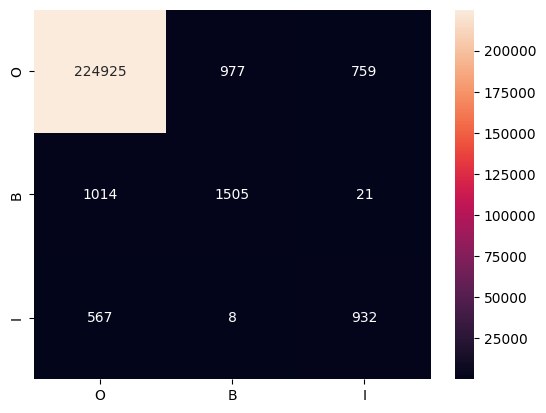

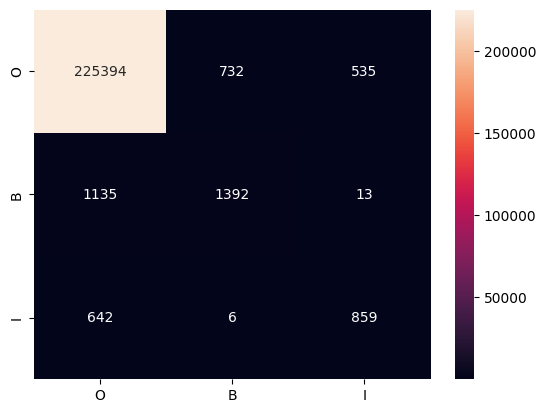

TrainOutput(global_step=2672, training_loss=0.026019118860096276, metrics={'train_runtime': 714.6125, 'train_samples_per_second': 14.954, 'train_steps_per_second': 3.739, 'total_flos': 1422777275970174.0, 'train_loss': 0.026019118860096276, 'epoch': 2.0})

In [54]:
training_args = TrainingArguments(
    output_dir="skill_extract_model",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    # push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

## Inference

Great, now that you've finetuned a model, you can use it for inference!

Grab some text you'd like to run inference on:

In [55]:
text = 'We need someone who is good at Python and Java and C and knows .Net too.'
text2 = ['Good with machine learning. Excellent Azure knowledge.','Good with Python and NLP']

The simplest way to try out your finetuned model for inference is to use it in a [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Instantiate a `pipeline` for NER with your model, and pass your text to it:

In [56]:
from transformers import pipeline

classifier = pipeline("ner", model="/content/skill_extract_model/checkpoint-2672")
classifier(text2)

[[{'entity': 'B',
   'score': 0.67167675,
   'index': 7,
   'word': 'ĠAzure',
   'start': 38,
   'end': 43}],
 [{'entity': 'B',
   'score': 0.95453846,
   'index': 3,
   'word': 'ĠPython',
   'start': 10,
   'end': 16},
  {'entity': 'B',
   'score': 0.8467049,
   'index': 5,
   'word': 'ĠN',
   'start': 21,
   'end': 22},
  {'entity': 'I',
   'score': 0.58308274,
   'index': 6,
   'word': 'LP',
   'start': 22,
   'end': 24}]]

In [57]:
def extract_entities(bio_result):
    entity = ''
    entities = []
    flag = 0
    for i in bio_result:
        if i['entity'] == 'I' and flag == 1:
            entity += i['word'].replace(" ##", "").replace("##", "").replace("Ġ", "")
        elif i["entity"] == 'B':
            if entity != '':
                entities.append(entity)
            entity = ''
            flag = 1
            entity = i['word'].replace(" ##", "").replace("##", "").replace("Ġ", "")
        else:
            flag = 0
            if entity != '':
                entities.append(entity)
            entity = ''

    if entity != '':
                entities.append(entity)
    return entities

In [61]:
# extract_entities(classifier(text2))
# classifier(text2)[0]

ex2 = tokenized_dataset['validation'][369]
ex2['skills']

'public cloud, Cloud Engineer, Cloud, Cloud Security, Go, Python'

In [62]:
extract_entities(classifier(ex2['job_desc']))

['CloudEngineer', 'AWS', 'Python', 'Go']

In [63]:
val_df["skills"]

3248                                                  SQL
4602                                                  AWS
5952    Data Science, Medidata, data science, SQL, Mat...
1562                                        Web Developer
1617                                                  NaN
                              ...                        
807                                    data science, data
462                                    front-end, Sunroom
879                                  Information Security
5493               Cyber Security, Enterprise Engineering
3326                                                  NaN
Name: skills, Length: 1336, dtype: object

In [64]:
from tqdm import tqdm

preds = []
for i in tqdm(val_df["job_desc"].tolist()):
    preds.append(classifier(i))


100%|██████████| 1336/1336 [11:16<00:00,  1.97it/s]


In [65]:
predictions = [extract_entities(i) for i in preds]
predictions

[['SQL'],
 ['DevOps', 'AWS', 'Linux', 'Bash', 'AWS', 'Cloud'],
 ['Python', 'SQL', 'DataScience', 'Medidata'],
 ['WebDeveloper'],
 [],
 [],
 ['machinelearning', 'deeplearning'],
 [],
 ['AWS', 'DNS'],
 [],
 ['SQL'],
 ['Java', 'JavaScript'],
 ['InformationSecurity'],
 [],
 ['Java'],
 [],
 [],
 [],
 [],
 [],
 ['IT', 'IT', 'DatabaseDeveloper'],
 ['SQLDeveloper', 'SQL', 'SSRS', 'SQL', 'SSRS', 'SQL'],
 ['Azure', 'GCP', 'AWS'],
 [],
 ['SQL'],
 ['Java', 'C++', 'Python', 'JavaScript'],
 [],
 ['WebSockets'],
 [],
 [],
 ['machinelearning'],
 ['Rapid7'],
 ['JavaScript', 'JavaScript'],
 ['Cybersecurity'],
 ['JavaScript'],
 ['AWS', 'Lambda'],
 ['DevOps', 'AWS', 'AWS', 'GCP'],
 ['Windows', 'Security'],
 [],
 ['Cloud', 'Terraform', 'AWS'],
 [],
 [],
 [],
 ['Azure', 'Cloud', 'Azure', 'AWS', 'InformationSecurity'],
 [],
 ['Python', 'Java', 'Keras'],
 ['PHP', 'PHP', 'PHP'],
 [],
 ['Python', 'JavaScript', 'CSS'],
 [],
 ['ServiceChannel', 'DatabaseEngineer'],
 ['Angular10', 'HTML', 'CSS', 'HTML', 'CSS'],
 [

In [66]:
gold = val_df["skills"].tolist()

In [67]:
def evaluate(gold, pred):
    gold_count = 0
    pred_count = 0
    TP = 0
    for i,j in zip(gold, pred):
        if type(i) != str:
            i = set()
        else:
            i = set([s.strip().replace(" ", "").replace("Ġ", "") for s in i.split(',')])
        j = set(j)
        TP += len(i.intersection(j))
        gold_count += len(i)
        pred_count += len(j)
    prec = TP / pred_count
    recall = TP / gold_count
    f1 = 2 * prec * recall / (prec + recall)
    return prec, recall, f1

In [68]:
evaluate(gold, predictions)

(0.5681502086230876, 0.40505701536936045, 0.47293777134587556)